In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
# Loading the dataset into a dataframe

diabetes_data = pd.read_csv('C:\\Users\\admin\\Documents\\My books\\Machine Learning Pathway\\Datasets\\diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Checking the shape of the dataset

diabetes_data.shape

(768, 9)

In [11]:
# Checking for missing values in the dataset

diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# Checking for dataset imbalance

diabetes_data.value_counts('Outcome')

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
# Checking for the mean values of input features for the target(outcome) values

diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [13]:
# Checking the correlation between input features and patient outcome

correlation = diabetes_data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

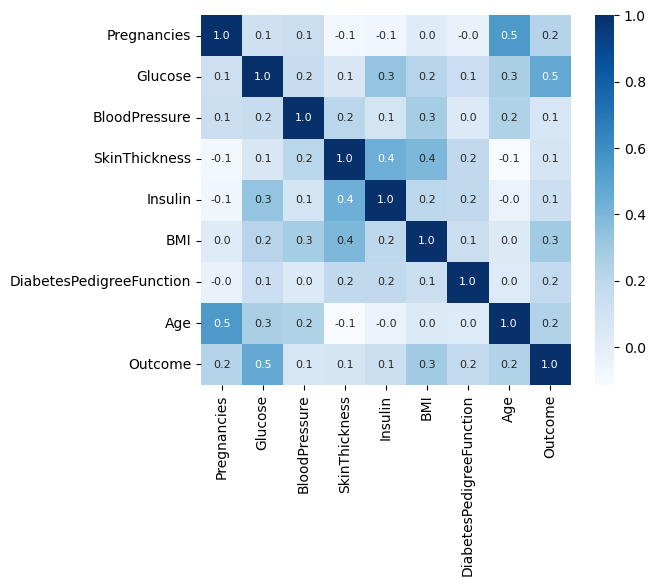

In [16]:
# Plotting a heat map to show the correlation between features in the dataset and the outcomes

sns.heatmap(correlation, cbar=True, square=True, annot=True, annot_kws={'size':8}, fmt='.1f', cmap='Blues')

In [20]:
# seperating the input features from the target

features = diabetes_data.iloc[:,:-1].values
target = diabetes_data.iloc[:,-1].values

# loading the standard scaler
scaler = StandardScaler()

# Standardizing the input features
standardized_features = scaler.fit_transform(features)
standardized_features

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [22]:
x_train, x_test, y_train , y_test = train_test_split(standardized_features, target, stratify=target, test_size=0.2, random_state=3)
print(standardized_features.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


In [33]:
class LogisticRegression():

    def __init__(self, learning_rate, no_of_iter):

        # Initializing the learning rate and number of iterations(Hyperparameters of the model)
        self.learning_rate = learning_rate
        self.no_of_iter = no_of_iter


    def fit(self, x, y):

        # Defining the number of datapoints and features in the dataset
        self.nd, self.nf = x.shape

        # Initializing the model parameters(weight and bais) and assigning them random values
        self.w = np.zeros(self.nf)
        self.b = 0
        self.x = x
        self.y = y

        # Implementing the gradient decent
        for j in range(self.no_of_iter):
            self.update_para()


    def update_para(self):

        # Initializing the sigmoid function(defining y_hat)
        y_hat = 1/(1 + np.exp(-(self.x.dot(self.w) + self.b)))
        
        # Initializing the partial derivative of the cost function with respect to w and b
        dw = (1/self.nd)*np.dot(self.x.T, (y_hat - self.y))
        db = (1/self.nd)*np.sum(y_hat - self.y)  #we use the numpy sum function here to obtain a single value, recall we have only 1 bias but multiple w

        # Updating model parameters
        self.w = self.w - (self.learning_rate*dw)
        self.b = self.b - (self.learning_rate*db)


    def predict(self, x):

        # Implementing the sigmoid function
        y_prediction = 1/(1 + np.exp(-(x.dot(self.w) + self.b)))

        # Defining boundary - recall that our y can take one of 2 values either 0 or 1 while y_pred can take values from 0-1. 
        # So we want to encode that if we get a value >0.5 means that our value for y should be 1 other wise it should be 0
        y_prediction = np.where(y_prediction>0.5,1,0)  #Interpreted as written in the line above
        return y_prediction

In [34]:
# Load an instance of our Logistic regression model
model = LogisticRegression(0.02, 1000)

In [35]:
#Fitting the model with training data
model.fit(x_train,y_train)

In [36]:
#Printing model parameters - weight and bais after specified number of iterations on the data

print(model.w,'\n\n')
print(model.b)

[ 0.42883109  1.02604071 -0.28488257  0.04001917  0.0524523   0.5341876
  0.26405893  0.20042149] 


-0.8281451689136939


In [38]:
# Model evaluation on the training data
train_prediction = model.predict(x_train)
train_accuracy = accuracy_score(train_prediction, y_train)
train_accuracy

0.7817589576547231

In [39]:
# Model evaluation on the test data
test_prediction = model.predict(x_test)
test_accuracy = accuracy_score(test_prediction, y_test)
test_accuracy

0.7207792207792207